In [1]:
from mitotic_classifer import *


# Running SVM model with file:230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#
## check the number of M and G2 cells


In [2]:
df_ori=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_final_data.csv')
df_cellcyle=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_singlecell_cellcycle.csv')
df_cellcyle.groupby('cell_cycle_detailed').count()

,Unnamed: 0,experiment,plate_id,well,well_id,image_id,cell_line,condition,Cyto_ID,area_cell,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,3559,3559,3559,3559,3559,3559,3559,3559,3559,3559,...,3559,3559,3559,3559,3559,3559,3559,3559,3559,3559
G1,32864,32864,32864,32864,32864,32864,32864,32864,32864,32864,...,32864,32864,32864,32864,32864,32864,32864,32864,32864,32864
G2,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618,...,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618
Late S,2309,2309,2309,2309,2309,2309,2309,2309,2309,2309,...,2309,2309,2309,2309,2309,2309,2309,2309,2309,2309
M,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
Polyploid,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,...,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549
Polyploid (replicating),208,208,208,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,208,208,208
Sub-G1,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203


## Merge two files

In [3]:


df_all=merge_data(df1=df_ori,df2=df_cellcyle,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all.groupby('cell_cycle').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed
cell_cycle,,,,,,,,,,,,,,,,,,,,,
G1,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713,...,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713
G2/M,16872,16872,16872,16872,16872,16872,16872,16872,16872,16872,...,16872,16872,16872,16872,16872,16872,16872,16872,16872,16872
Polyploid,908,908,908,908,908,908,908,908,908,908,...,908,908,908,908,908,908,908,908,908,908
Polyploid (replicating),116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
S,5766,5766,5766,5766,5766,5766,5766,5766,5766,5766,...,5766,5766,5766,5766,5766,5766,5766,5766,5766,5766
Sub-G1,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


## select all the M cell and equal number G2 cells, extracting the interesting columns making a dataset for training
# without Edu

In [4]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(72)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data

,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,RPE-1,NT,180.0,116.0,34292.032797,17973.115961,2.084881e+06,590,34292.032797,5533.008170,...,27631.337430,8932.832699,1,2.084881e+06,3.492299,1.045731,0.427910,0.765523,M,G2/M
1,RPE-1,DMSO,82.0,303.0,16466.344597,9909.679507,3.002633e+06,2238,16466.344597,2306.672795,...,14790.759796,7799.973569,1,3.002633e+06,5.029586,0.980989,1.623155,1.999598,G2,G2/M
2,RPE-1,Palb_24h,37.0,143.0,25322.183792,15519.139058,2.219237e+06,1051,25322.183792,3204.045518,...,16234.320108,7680.066743,1,2.219237e+06,3.717352,1.137097,0.762259,0.943705,M,G2/M
3,RPE-1,Palb_12h,35.0,157.0,23059.675531,15201.148211,2.386580e+06,730,23059.675531,5097.578627,...,23784.560876,9981.391463,1,2.386580e+06,3.997662,1.079460,0.529447,1.036095,M,G2/M
4,RPE-1,DMSO,90.0,262.0,12367.754779,8956.534554,2.346612e+06,2279,12367.754779,1934.650765,...,15823.129710,6819.430421,1,2.346612e+06,3.930713,1.021417,1.652891,1.729025,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,RPE-1,Palb_12h,148.0,126.0,44965.360846,20985.728455,2.644202e+06,472,44965.360846,7407.488114,...,29573.820189,11294.131064,1,2.644202e+06,4.429193,1.101093,0.342328,0.831516,M,G2/M
140,RPE-1,NT,67.0,160.0,24487.504580,14958.144141,2.393303e+06,734,24487.504580,4760.921842,...,25084.674106,11773.495742,1,2.393303e+06,4.008923,1.033747,0.532349,1.055893,M,G2/M
141,RPE-1,DMSO,230.0,143.0,22486.731166,16486.633779,2.357589e+06,733,22486.731166,4888.200046,...,21039.502757,11189.944981,1,2.357589e+06,3.949099,1.072198,0.531623,0.943705,M,G2/M
142,RPE-1,DMSO,108.0,156.0,21342.214388,13828.156590,2.157192e+06,821,21342.214388,3829.775584,...,14447.891344,8060.169912,1,2.157192e+06,3.613424,1.058262,0.595447,1.029496,G2,G2/M


# input data (72 G2 cell + 72 M cell)
##  cross validation

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[1.         0.9        1.         1.         0.9        0.9
 1.         0.77777778 0.77777778 0.88888889]  Mean:0.9144444444444446


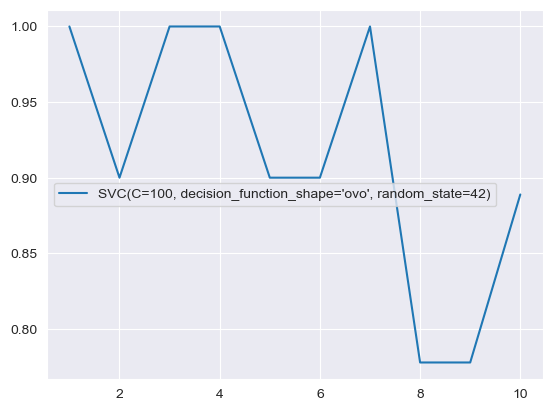

In [5]:
x_train,x_test,y_train,y_test=preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.875


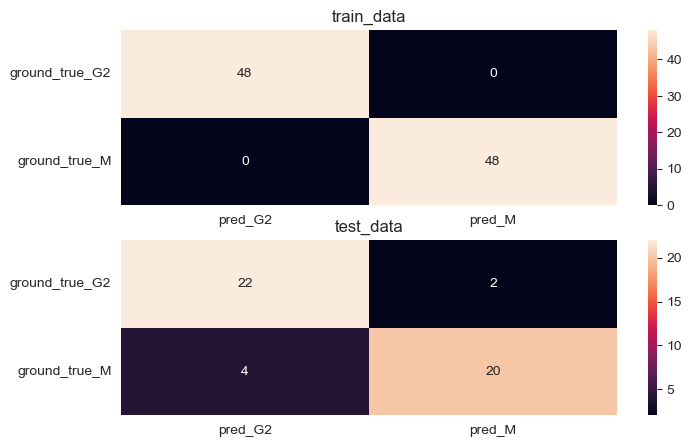

In [6]:
clf_svm_hp=svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

# pre-trained SVM

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.875


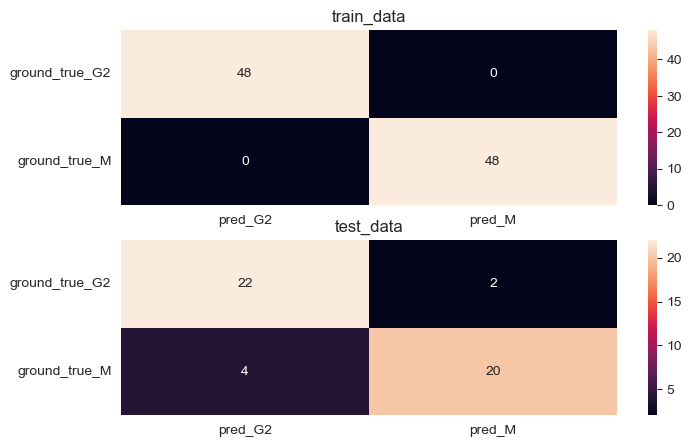

In [7]:
from joblib import dump, load
pretrained_svm=load('pretrained_SVM_U20S_without_edu.joblib')
check_classifier(clf=pretrained_svm,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)


# include EdU

In [8]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(72)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus',                                                                                                             'intensity_max_EdU_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell',
       'intensity_mean_EdU_cell', 'intensity_max_EdU_cyto',
       'intensity_mean_EdU_cyto',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)
data


,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_mean_Tub_cell,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,RPE-1,Palb_24h,148.0,222.0,15849.730315,10424.386571,2.314214e+06,1149,50777.830322,3899.012456,...,10646.528981,18552.399537,10692.812124,1,2.314214e+06,3.876444,0.974666,0.833336,1.465052,M
1,RPE-1,DMSO,48.0,118.0,37122.812081,21442.335793,2.530196e+06,613,37122.812081,5423.252591,...,15642.451419,31400.111648,15473.151930,1,2.530196e+06,4.238226,1.179007,0.444591,0.778721,M
2,RPE-1,DMSO,27.0,302.0,10862.668523,7649.964221,2.310289e+06,1570,10862.668523,2491.993883,...,6218.364545,9783.860426,6394.938852,1,2.310289e+06,3.869870,0.919036,1.138675,1.992998,G2
3,RPE-1,NT,200.0,164.0,28041.063912,15485.123683,2.539560e+06,698,28041.063912,5407.952281,...,11171.011750,20746.910335,10761.635712,1,2.539560e+06,4.253912,1.022942,0.506239,1.082291,M
4,RPE-1,1NM_12h,111.0,316.0,8864.433842,6174.326860,1.951087e+06,2334,8864.433842,1907.396768,...,10391.936675,17856.571554,10197.500092,1,1.951087e+06,3.268185,0.970901,1.692781,2.085389,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,RPE-1,DMSO,73.0,225.0,15289.730177,10815.939790,2.433586e+06,1413,15289.730177,2850.472307,...,7864.477376,13067.699242,7817.292479,1,2.433586e+06,4.076400,0.965645,1.024807,1.484850,G2
140,RPE-1,DMSO,24.0,98.0,43547.528791,23394.154982,2.292627e+06,666,43547.528791,5345.041620,...,9551.768113,22397.153448,8492.610596,1,2.292627e+06,3.840285,1.035048,0.483030,0.646735,M
141,RPE-1,Palb_12h,35.0,157.0,23059.675531,15201.148211,2.386580e+06,730,23059.675531,5097.578627,...,10170.294022,23784.560876,9981.391463,1,2.386580e+06,3.997662,1.079460,0.529447,1.036095,M
142,RPE-1,TAK931_24h,30.0,111.0,40296.781362,21153.366770,2.348024e+06,719,40296.781362,5668.645897,...,12654.133361,32433.298905,11056.387668,1,2.348024e+06,3.933077,1.050168,0.521469,0.732526,M


the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.9        1.         1.         0.9        0.9        0.9
 1.         0.88888889 1.         1.        ]  Mean:0.9488888888888889


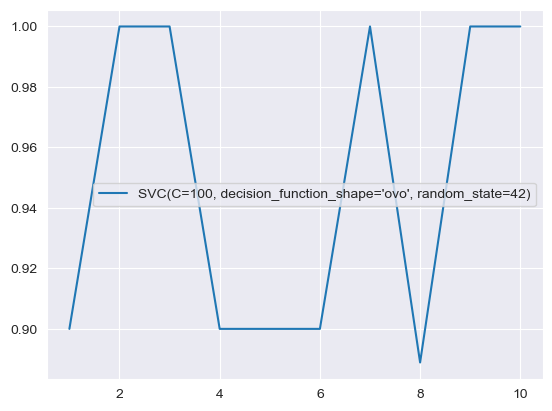

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.9375


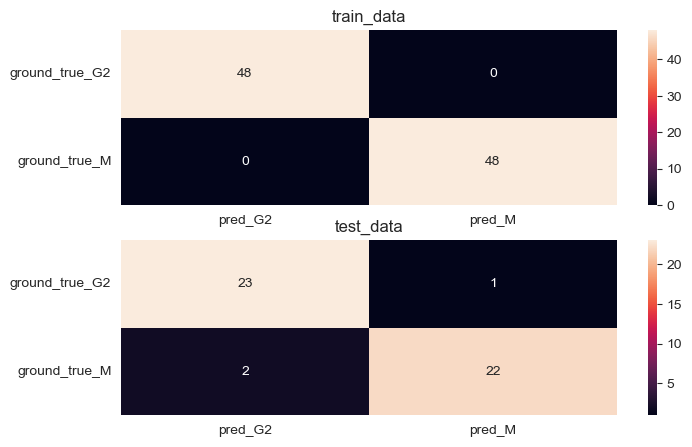

In [9]:
x_train,x_test,y_train,y_test=preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.9375


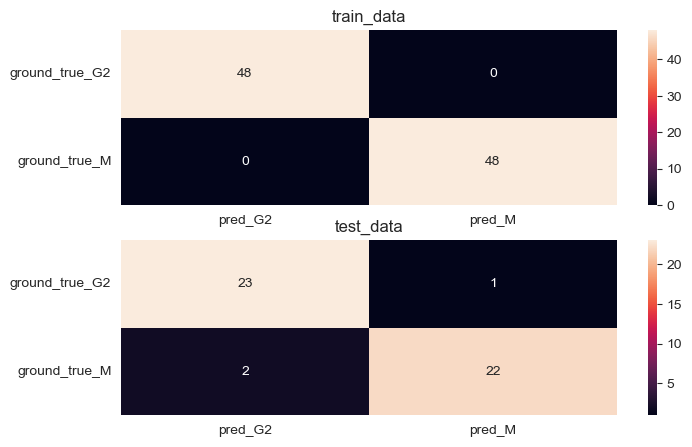

In [10]:
from joblib import dump, load
# dump(clf_svm_hp, 'pretrained_SVM_U20S_with_edu.joblib')
pretrained_svm=load('pretrained_SVM_U20S_with_edu.joblib')
check_classifier(clf=pretrained_svm,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

# classification  of G1 S and G2/M
# without Edu

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.78682842 0.78682842 0.80138768 0.80832611 0.77623591 0.79011275
 0.79618387 0.79618387 0.77103209 0.79531657]  Mean:0.7908435683568297


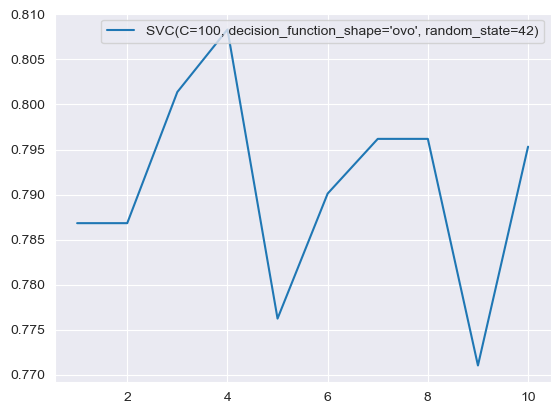

the accuracy of model run with train data 0.8341137703780784
the accuracy of model run with test data 0.7948317724592439


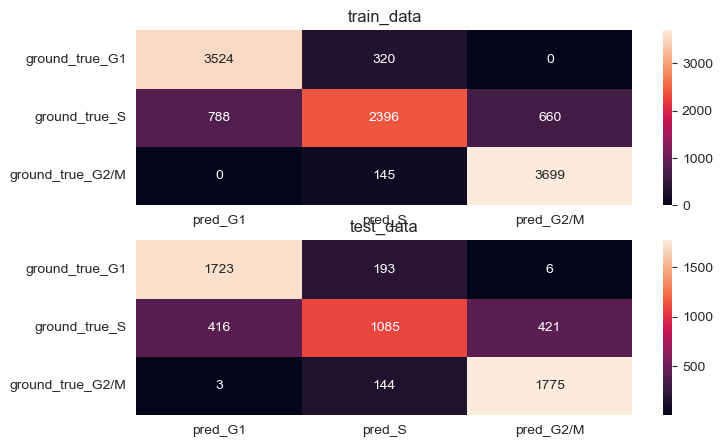

In [11]:
data_G1_S_G2_M=pd.concat([df_all[df_all['cell_cycle']=="G2/M"].head(5766),df_all[df_all['cell_cycle_detailed']=="G1"].head(5766),df_all[df_all['cell_cycle']=="S"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle']].sample(frac=1).reset_index(drop=True)



x_train,x_test,y_train,y_test=preprecess_classifier(data_G1_S_G2_M,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle')
clf_svm_hp=svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier_G1_S_G2M(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)


# with Edu

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.98786828 0.99220104 0.98352125 0.98785776 0.99045967 0.99306158
 0.98872507 0.98959237 0.98612316 0.98612316]  Mean:0.9885533331028542


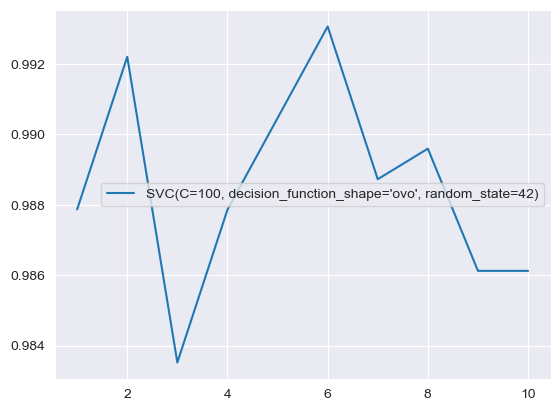

the accuracy of model run with train data 0.9994797086368367
the accuracy of model run with test data 0.9885535900104059


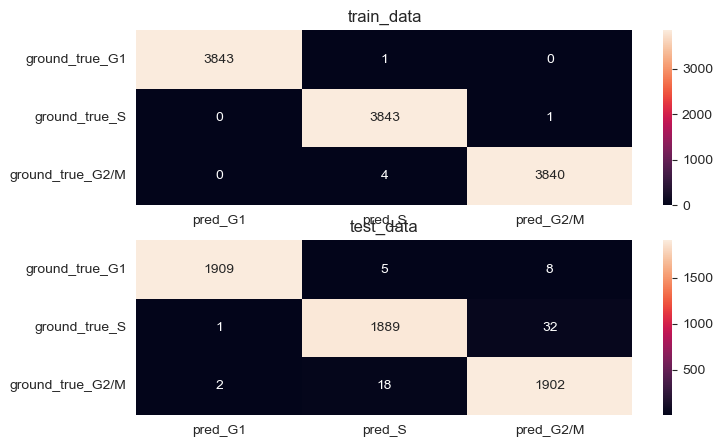

In [12]:
x_train,x_test,y_train,y_test=preprecess_classifier(data_G1_S_G2_M,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle')
clf_svm_hp=svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier_G1_S_G2M(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
